### Interpreting changes to the neural networks
One of the benefits of our model is that it is more interpretable as we can plot the transition and observation likelihood functions and see how they have changed, which gives us some idea of how the network has changed.

In [15]:
from harvey_sv_model import HarveySVPF
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

First lets write our code to load up our full model so that we can plot its results

In [47]:
model_config = {
    "num_particles": 128,
    "input_size": 1,
    "hidden_dimension": 1
}

untrained_model = HarveySVPF(model_config)

trained_model = HarveySVPF(model_config)
current_device = torch.device("cpu")
print("loading model from checkpoint")
trained_model.load_state_dict(torch.load("./models/pfrnn_epoch_1.pt", map_location=current_device))

loading model from checkpoint


<All keys matched successfully>

In [53]:
def obs(x, model):
    sigmoid = nn.Sigmoid()
    l1 = sigmoid(model.rnn.fc_obs_l1(x))
    l2 = sigmoid(model.rnn.fc_obs_l2(l1))
    out = sigmoid(model.rnn.fc_obs_l3(l2))
    return out

def trans(x, model):
    sigmoid = nn.Sigmoid()
    l1 = sigmoid(model.rnn.fc_trans_l1(x))
    l2 = sigmoid(model.rnn.fc_trans_l2(l1))
    out = model.rnn.fc_trans_l3(l2)
    return out


### Plotting the differences
Lets begin by plotting the different observation transformation functions

In [97]:
ps = np.linspace(0.1, 2.1, 50)
os = np.linspace(-2, 2, 50)

xs = []
for p in ps:
    for o in os:
        xs.append([p, o])

xs = torch.tensor(xs, dtype=torch.float32)

y_pred = obs(xs, trained_model)
y_pred = y_pred.detach().numpy()

y_pred_untrained = obs(xs, untrained_model)
y_pred_untrained = y_pred_untrained.detach().numpy()


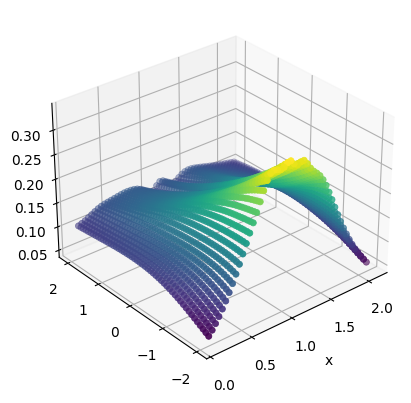

In [112]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, y_pred, 50, cmap='hot')

X, Y = np.meshgrid(ps, os)
ax.set_xlabel('x')

ax.scatter(X, Y, y_pred, c=y_pred, cmap='viridis', linewidth=0.5, label="trained")

#ax.scatter(X, Y, y_pred_untrained, c=y_pred_untrained, cmap='winter', linewidth=0.4, label="untrained")


ax.view_init(30, 230)

fig.savefig("./saved_figs/change_in_obs_func.png")